In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
x,y=make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=2,
    n_redundant=0,
    random_state=43
)

In [12]:
x.shape

(1000, 2)

In [13]:
df=pd.DataFrame(x,columns=['f1','f2'])

In [14]:
df["target"]=y

In [15]:
df.head()

,f1,f2,target
0,1.389753,1.022354,1
1,-0.814215,1.149400,0
2,-0.817784,-1.161035,0
3,0.950891,-0.547975,1
4,-2.693319,-2.459255,0


In [16]:
df.shape

(1000, 3)

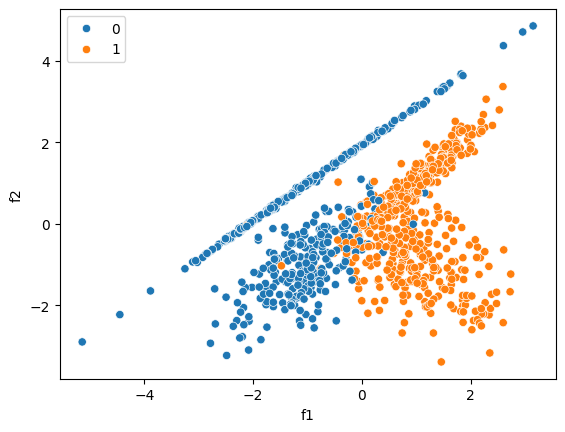

In [18]:
snb.scatterplot(x=df["f1"],y=df["f2"],hue=y)
plt.show()

In [25]:
def check_model(x,y,kernels):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)

  for kernel in kernels:
    model=SVC(kernel=kernel)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clas=classification_report(y_test,y_pred)
    print(f"model name : {kernel}")
    print(f"accuracy accuracy is : {acc}")
    print(f"confusion matrix is : {conf}")
    print(f"classifiction report is : {clas}")
    print("\n")

In [28]:
kernels=["linear","sigmoid","poly","rbf"]
check_model(x,y,kernels)

model name : linear
accuracy accuracy is : 0.91
confusion matrix is : [[96 10]
 [ 8 86]]
classifiction report is :               precision    recall  f1-score   support

           0       0.92      0.91      0.91       106
           1       0.90      0.91      0.91        94

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



model name : sigmoid
accuracy accuracy is : 0.855
confusion matrix is : [[96 10]
 [19 75]]
classifiction report is :               precision    recall  f1-score   support

           0       0.83      0.91      0.87       106
           1       0.88      0.80      0.84        94

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



model name : poly
accuracy accuracy is : 0.865
confusion matrix is : [[81 25]
 [ 2 92]]
classifiction report i

In [29]:
param_grid={
    "C":[0.1,1,10,100],
    "gamma":[1,0.1,0.01,0.001],
    "kernel":["linear","sigmoid","poly","rbf"]
}

In [30]:
svc=SVC()

In [31]:
grid=GridSearchCV(
  estimator=svc,
  param_grid=param_grid,
  n_jobs=-1,
  cv=5
)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [34]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
grid.best_score_

np.float64(0.9650000000000001)

In [36]:
grid.best_estimator_

SVC(C=100, gamma=0.01)